In [1]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 19.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=dc57

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [3]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=aa039d4c6e9506b4dac542d58d66ab9baee92668feee46a06f3e0d1015e1d5dd
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 39.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=e2c00f522d1dd4d3a7f65cc23eba9c67d46f93333b131ed9af1597a60bd03971
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.8.0
    Uninstalling emoji-2.8.0:


In [4]:
# #Tokenizer
# from bnlp import NLTKTokenizer
# bnltk = NLTKTokenizer()

# #for Train Set
# for i in range(0,trainSet.shape[0]):
#     text = bnltk.word_tokenize(trainSet['Data'][i])
#     trainSet['Data'][i] = str(text)
# #For Test Set   
# for i in range(0,testSet.shape[0]):
#     text = bnltk.word_tokenize(testSet['Data'][i])
#     testSet['Data'][i] = str(text)

In [5]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [6]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [7]:
X_train

['মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোমায় কোথায় পামু. আমি তোমার সাথে যাবু. গান কমু তোমার মতো গলি ঘুরমু.',
 'এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায় এই তিনটা পুলিশ কে তরে সবার সামনে মেরে পেলা দরকার ',
 'ভাই আপনার কথাই যাদু রয়েছে',
 'উওরটা আমার অনেক ভাল লেগেছে ',
 'আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ? প্রাইভেট কার নিয়ে ?',
 'যেমন : পরীক্ষার রেজাল্টের সময় , বিভিন্ন ব্যানিজ্যিক প্রচার ইত্যাদি ',
 'বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআনের পাখিদের কোন খবর নাই আরিফ অব্যয় বোদার বয় সিঙ্গেল বয় জাতি হিসেবে বাঙালি বর্তমানে কত মুরুক্ষ এটা তারই প্রমাণ ঝাড়ু মার তোর কপালে',
 'সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই , চোখ খুলে দিছো ',
 'আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে ? গালিবয়',
 'তুমি রেপারই হও , ডাক্তার হওয়ার দরকার নাই তোমার ',
 'লেসবো মেয়েটার ফ্রেন্ড টা অনেক কিউট ',
 'আচ্ছা চারপাশে অন্ধকার কেন ? লাইট টা শুধু আপনাদের টেবিলে পড়ছে কেন',
 'আল্লাহ আপনাকে হায়াত দারাজ করুন এবং সবার মাঝে সুস্থ ভাবে বেঁচে থাকার তৌফিক দান করুক',
 'ভাই এতো সুন্দর ভিডিও বানান 

In [8]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [9]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [10]:
y_train

['1',
 '2',
 '1',
 '1',
 '0',
 '0',
 '2',
 '1',
 '0',
 '0',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '0',
 '0',
 '2',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '2',
 '0',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '0',
 '2',
 '1',
 '0',
 '1',
 '1',
 '0',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '0',
 '1',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '2',
 '1',
 '2',
 '0',
 '2',
 '0',
 '0',
 '0',
 '1',
 '2',
 '1',
 '0',
 '0',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '0',
 '1',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '0',
 '0',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '1',
 '2'

In [11]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 44


In [12]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 929s 721ms/step - loss: 0.9077 - accuracy: 0.5795 - val_loss: 0.8210 - val_accuracy: 0.6438
Epoch 2/10
1258/1258 [==============================] - 902s 717ms/step - loss: 0.7353 - accuracy: 0.6801 - val_loss: 0.7552 - val_accuracy: 0.6860
Epoch 3/10
1258/1258 [==============================] - 901s 716ms/step - loss: 0.5837 - accuracy: 0.7596 - val_loss: 0.7521 - val_accuracy: 0.7024
Epoch 4/10
1258/1258 [==============================] - 903s 718ms/step - loss: 0.4194 - accuracy: 0.8352 - val_loss: 0.7901 - val_accuracy: 0.7144
Epoch 5/10
1258/1258 [==============================] - 902s 717ms/step - loss: 0.2877 - accuracy: 0.8909 - val_loss: 0.8671 - val_accuracy: 0.7131
Epoch 6/10
1258/1258 [==============================] - 900s 716ms/step - loss: 0.1940 - accuracy: 0.9297 - val_loss: 1.1805 - val_accuracy: 0.7100
Epoch 7/10
1258/1258 [===========================

In [13]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 10s 144ms/step
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       361
           1       0.75      0.81      0.78       654
           2       0.75      0.78      0.76       571

    accuracy                           0.72      1586
   macro avg       0.69      0.69      0.69      1586
weighted avg       0.71      0.72      0.72      1586



array([[169, 101,  91],
       [ 68, 532,  54],
       [ 56,  72, 443]])

In [14]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

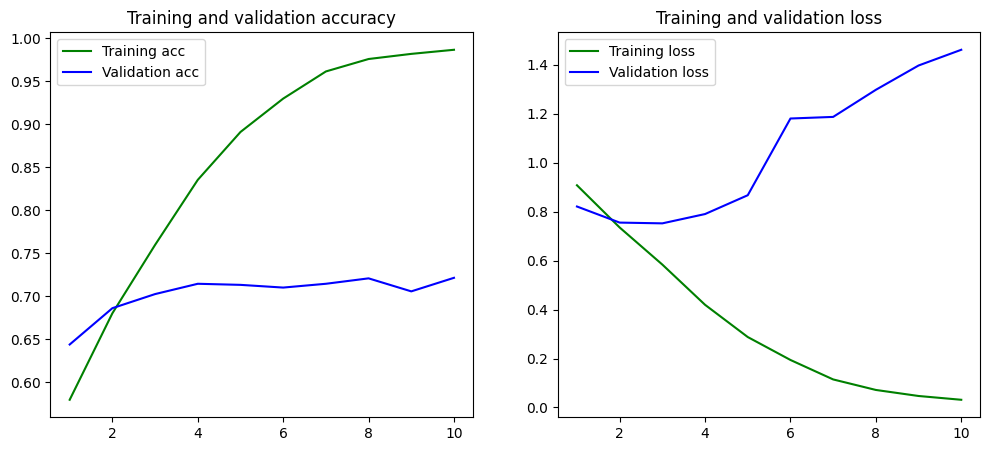

In [15]:
PlotGraph(history)